In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
                            import shap
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(2)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,panel,1971.0,1.0,9.0,Dmitrovskoe,7126815.285,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,panel,1978.0,1.0,10.0,Savelovskoe,2641243.496,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8894 non-null   int64  
 1   life_sq             8894 non-null   float64
 2   floor               8894 non-null   float64
 3   max_floor           8894 non-null   float64
 4   material            8894 non-null   object 
 5   build_year          8859 non-null   float64
 6   num_room            8894 non-null   float64
 7   kitch_sq            8894 non-null   float64
 8   sub_area            8894 non-null   object 
 9   area_m              8894 non-null   float64
 10  green_zone_part     8894 non-null   float64
 11  indust_part         8894 non-null   float64
 12  preschool           8894 non-null   int64  
 13  school              8894 non-null   int64  
 14  healthcare          8894 non-null   int64  
 15  shopping            8894 non-null   int64  
 16  office

In [5]:
#у нас есть пропуски - в основном в числовых столбцах, однако их достаточно мало, поэтому просто удалим эти строки
# в качестве альтернативы: пропуски можно было бы заменить медианными значениями или, например, заполнить с помощью алгоритма mice
#однако в случае, когда пропусков меньше 1% их легче удалить
df = df.dropna()

In [6]:
# у нас естьеще и дубликаты; их надо удалить
df[df.duplicated() == True]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
311,46,28.0,1.0,9.0,panel,1968.0,2.0,5.0,Severnoe Medvedkovo,5.725729e+06,...,9.608767,0.800731,0.740340,15.126496,11.68,16.84,1,0,0,3000000
833,70,39.0,6.0,40.0,mass concrete,2012.0,2.0,4.0,Sokol,3.496890e+06,...,19.953545,1.662795,7.677885,9.031685,2.75,21.87,12,4,0,8070000
1210,65,44.0,4.0,12.0,panel,1973.0,3.0,9.0,Sokolinaja Gora,7.905261e+06,...,2.864861,0.238738,6.317802,8.464939,15.17,0.43,3,2,0,12000000
1639,67,46.0,2.0,5.0,panel,1961.0,3.0,8.0,Vostochnoe Izmajlovo,3.799999e+06,...,18.538619,1.544885,1.754192,13.148569,5.38,0.00,0,2,0,3000000
1880,72,43.0,12.0,17.0,panel,1992.0,3.0,10.0,Juzhnoe Tushino,7.887684e+06,...,33.694863,2.807905,0.454026,16.184920,23.13,32.01,4,2,0,10900000
2130,53,30.0,12.0,12.0,panel,1982.0,2.0,8.0,Nagatinskij Zaton,9.589337e+06,...,32.944403,2.745367,8.179227,9.256497,7.70,14.36,0,1,0,7500000
2144,40,18.0,13.0,15.0,brick,1973.0,1.0,8.0,Caricyno,8.287309e+06,...,3.943454,0.328621,6.277043,13.097704,5.80,5.57,0,1,0,7050000
2159,72,43.0,12.0,17.0,panel,1992.0,3.0,10.0,Juzhnoe Tushino,7.887684e+06,...,33.694863,2.807905,0.454026,16.184920,23.13,32.01,4,2,0,10900000
2288,37,17.0,14.0,25.0,mass concrete,2003.0,1.0,10.0,Butyrskoe,5.027634e+06,...,2.581124,0.215094,9.067890,7.585965,5.01,11.41,0,2,0,9400000
2417,53,32.0,11.0,17.0,panel,2009.0,2.0,9.0,Novo-Peredelkino,8.591335e+06,...,30.188386,2.515699,5.760711,20.250885,0.81,0.33,0,0,0,8200000


In [7]:
df = df.drop_duplicates()

In [8]:
# у нас также есть столбцы с типом данных object - перекодируем их с помощью LabelEncoder() - хотя в случае с 
# material, sub_area это, вероятно, не будет иметь смысловой интерпретации в дальнейшем. Возможно, в дальнейшем удаление этих столбцов
# приведет к улучшению модели
lb_e = LabelEncoder()

for i in df.select_dtypes(include=['object']).columns:
    df[i] = lb_e.fit_transform(df[i])

df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,4,1971.0,1.0,9.0,21,7.126815e+06,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,4,1978.0,1.0,10.0,111,2.641243e+06,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,4,1989.0,1.0,8.0,48,1.084231e+07,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,4,1986.0,1.0,8.0,13,7.587523e+06,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,4,1968.0,3.0,6.0,75,4.395333e+06,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000


In [9]:
# попробуем просто построить регрессию, однако, вероятно, потребуется масштабирование
X = df.drop(['price_doc'], axis=1)
y = df[['price_doc']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

r_2 = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print('Mean Square Error', round(mse, 3), '\nR-Square value', round(r_2, 3))

Mean Square Error 10080618263019.13 
R-Square value 0.526


Линейная Регрессия: 10_080_618_263_019.13

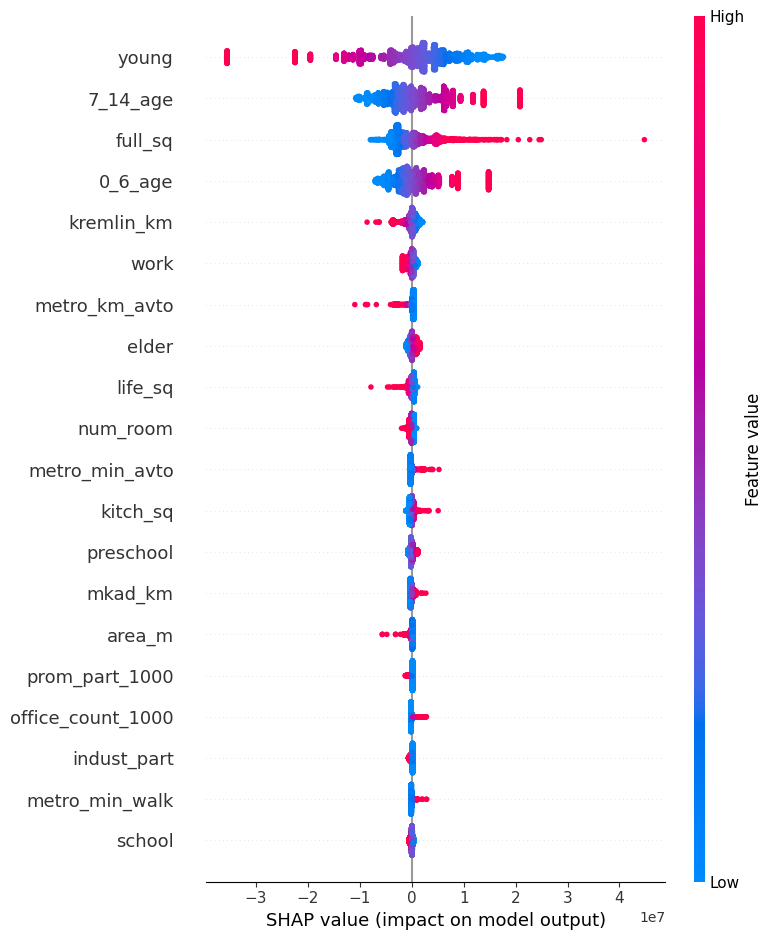

In [10]:
X = df.drop(['price_doc'], axis=1)
y = df[['price_doc']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(train_X, train_y)
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X)

In [11]:
# удалим признаки, которые не отразились на графике
df_feat = df.drop(['floor', 'max_floor', 'material', 'build_year', 'sub_area', 'green_zone_part', 'healthcare',
                   'shopping', 'office', 'radiation', 'detention', 'metro_km_walk', 'green_part_1000', 'trc_count_1000',
                  'leisure_count_1000'], axis=1)


In [12]:
X = df_feat.drop(['price_doc'], axis=1)
y = df_feat[['price_doc']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

r_2 = r2_score(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
print('Mean Square Error', round(mse, 3), '\nR-Square value', round(r_2, 3))

Mean Square Error 10160428000012.693 
R-Square value 0.522


MSE увеличилось - оставим признаки в модели

In [13]:
# проверим, что изменится с масштабированием данных

X = df.drop(['price_doc'], axis=1)
y = df[['price_doc']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
sc=StandardScaler()

x_train = sc.fit_transform(train_X)
x_test = sc.fit_transform(test_X)

reg = LinearRegression().fit(x_train, train_y)
pred = reg.predict(x_test)

r_2 = r2_score(test_y, pred)
mse = mean_squared_error(test_y, pred)
print('Mean Square Error', round(mse, 3), '\nR-Square value', round(r_2, 3))

Mean Square Error 10249449158891.104 
R-Square value 0.518


In [14]:
#попробуем логарифмирование
df1 = df.copy()
from sklearn.impute import SimpleImputer
df1[df1 < 0] = np.nan
imputer = SimpleImputer(strategy="median")
df1 = imputer.fit_transform(df1)

transformed_df1 = np.log1p(df1)
train_X_log, test_X_log, train_y, test_y = train_test_split(transformed_df1, y, test_size=0.33, random_state=42)


reg_log = LinearRegression().fit(train_X_log, train_y)
mse = mean_squared_error(reg_log.predict(test_X_log), test_y)
print('Mean Square Error', round(mse, 3))

Mean Square Error 3553818386630.359


Итого <br>
Линейная Регрессия: 10_080_618_263_019.13 <br>
с масштабированием: 10_249_449_158_891.104 <br>
с логарифмированием: 3_553_818_386_630.359 <br>
Можно также проверить и другие способы, но для этого слишком мало времени